**Seattle Airbnb**

1. **Business undestanding**

The question is to evaluate whether the terms used to describe the property matter.  

In this and a companion notebook, we will consider this question in three steps.

  * Q1: What are the most popular terms?
  * Q2: Are there any regional differences in the most popular terms?
  * Q3: Do these "buzzwords" matter?

In [1565]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

2. **Data understanding**

The next few steps examine the listings data base for Seattle and make some preliminary decisions about the variables that can be removed.

In [1566]:
#read and explore the data
seattle = pd.read_csv('Seattle_listings.csv')
seattle.shape

(3818, 92)

In [1567]:
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [1568]:
seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

**Remove unnecessary columns**
These columns are uniform:
  * requires_license all f
  * experiences_offered all 'none'
  * has_availability all t


We also remove the following:
  * host_listing_count, host_total_listings_count seem problematic (outliers); we keep calculated_host_listings_count
  * city, state, street, longitude, latitude all similar for this--Seattle--data base
  * url columns have no explanatory power

In [1569]:
#Remove unnecessary columns

df = seattle.drop(['id','scrape_id', 'listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
        'host_location','host_neighbourhood', 'host_about', 'host_verifications', 'host_response_time',
        'host_listings_count', 'host_total_listings_count', 'host_response_rate', 'host_acceptance_rate',
        'bed_type', 'amenities','street' , 'city', 'state', 'zipcode', 'market', 'smart_location', 'transit',
        'country_code', 'country', 'latitude', 'longitude','street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed','calendar_last_scraped', 'calendar_updated',
        'jurisdiction_names', 'requires_license', 'license', 'experiences_offered',
        'last_scraped', 'has_availability' ], axis=1)

In [1570]:
#also drop the availability 30, 60, 90, 365
df = df.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365'], axis = 1)
#also drop detailed reviews.  Keep only overall 'review_scores_rating',
df = df.drop(['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'], axis=1)

In [1571]:
print(df.shape)
df.head()

(3818, 37)


,name,summary,space,description,neighborhood_overview,notes,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,...,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,2011-08-11,f,t,t,...,207,2011-11-01,2016-01-02,95.0,f,moderate,f,f,2,4.07
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,2013-02-21,t,t,t,...,43,2013-08-19,2015-12-29,96.0,f,strict,t,t,6,1.48
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,2014-06-12,f,t,t,...,20,2014-07-30,2015-09-03,97.0,f,strict,f,f,2,1.15
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,2013-11-06,f,t,t,...,0,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,2011-11-29,f,t,t,...,38,2012-07-10,2015-10-24,92.0,f,strict,f,f,1,0.89


In [1572]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3818.000000,3191.000000
mean,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,22.223415,94.539262,2.946307,2.078919
std,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,37.730892,6.606083,5.893029,1.822348
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,0.020000
25%,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,93.000000,1.000000,0.695000
50%,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,9.000000,96.000000,1.000000,1.540000
75%,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,26.000000,99.000000,2.000000,3.000000
max,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,474.000000,100.000000,37.000000,12.150000


In [1573]:
# numeric columns
df.select_dtypes(include=['int', 'float'])

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,4,1.0,1.0,1.0,NaN,2,1,365,207,95.0,2,4.07
1,4,1.0,1.0,1.0,NaN,1,2,90,43,96.0,6,1.48
2,11,4.5,5.0,7.0,NaN,10,4,30,20,97.0,2,1.15
3,3,1.0,0.0,2.0,NaN,1,1,1125,0,NaN,1,NaN
4,6,2.0,3.0,3.0,NaN,6,1,1125,38,92.0,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,NaN,1,3,1125,1,80.0,8,0.30
3814,4,1.0,1.0,2.0,NaN,3,2,29,2,100.0,1,2.00
3815,2,1.0,1.0,1.0,NaN,2,1,7,0,NaN,1,NaN
3816,2,1.0,0.0,1.0,NaN,1,3,1125,0,NaN,1,NaN


In [1574]:
#categorical columns
df.select_dtypes(include=['object'])

,name,summary,space,description,neighborhood_overview,notes,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,...,monthly_price,security_deposit,cleaning_fee,extra_people,first_review,last_review,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,2011-08-11,f,t,t,...,NaN,NaN,NaN,$5.00,2011-11-01,2016-01-02,f,moderate,f,f
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,2013-02-21,t,t,t,...,"$3,000.00",$100.00,$40.00,$0.00,2013-08-19,2015-12-29,f,strict,t,t
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,2014-06-12,f,t,t,...,NaN,"$1,000.00",$300.00,$25.00,2014-07-30,2015-09-03,f,strict,f,f
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,2013-11-06,f,t,t,...,"$2,300.00",NaN,NaN,$0.00,NaN,NaN,f,flexible,f,f
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,2011-11-29,f,t,t,...,NaN,$700.00,$125.00,$15.00,2012-07-10,2015-10-24,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,We're located near lots of family fun. Woodlan...,NaN,2015-04-13,f,t,t,...,NaN,NaN,$230.00,$0.00,2015-09-27,2015-09-27,f,strict,f,f
3814,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,2015-10-14,f,t,t,...,NaN,$500.00,$50.00,$25.00,2015-12-18,2015-12-24,f,moderate,f,f
3815,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,2015-12-30,f,t,f,...,NaN,$250.00,$35.00,$20.00,NaN,NaN,f,moderate,f,f
3816,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,Madison Park offers a peaceful slow pace upsca...,NaN,2015-01-03,f,t,t,...,NaN,$300.00,$45.00,$0.00,NaN,NaN,f,moderate,f,f


3. **Data preparation**

In the following cells, we
  * parse the text fields to answer the first question--i.e., what are the keywords?
  * clean up the remaining columns to remove null values
  * change date fields to numeric values
  * engineer three new variables to be used in the data modeling

In [1575]:
#to find out the popular words, parse text in name column
def parse_text(df, col):
    '''
    INPUT:
    df - dataframe
    col - column to be parsed
    OUTPUT:
    a pandas series of words ranked by frequency
    '''
    text = df[col]
    all_t = ''
    for t in text:
        try:
            all_t = all_t + ' ' + t.lower()
        except:
            continue
    return pd.Series(all_t.split(' ')).value_counts()
word_rank = parse_text(df, 'name')    

In [1576]:
print(word_rank[0:50])

in           759
seattle      489
hill         393
room         386
home         346
private      332
capitol      292
apartment    272
cozy         266
modern       266
studio       261
the          243
downtown     236
view         231
-            230
bedroom      228
             219
near         209
house        194
&            185
with         170
of           169
2            167
1            166
to           162
lake         153
ballard      148
apt          146
queen        141
charming     128
spacious     123
on           113
and          112
suite        111
uw           109
anne         108
city         108
west         104
a            101
heart         99
cottage       98
craftsman     98
fremont       93
beautiful     87
urban         87
bed           81
quiet         81
condo         81
location      80
w/            77
dtype: int64


Note:  The same analysis for the 'summary' column did not show any new word.


Now we will clean up the list returned in the first pass, first removing generic terms and grammatical forms (prepositions, conjunctions, etc. ), then local references.

In [1577]:
#clean up the list returned in first pass
word_rank_ = word_rank.drop(labels=['in', 'the','to', '-', '&', 'with', 'w/', 'and', 'of', 'on', 'a', 'is',
                                    '1', '2', '3', 'from', 'this', 'you', 'our', 'has',
                                    'bedroom', 'room', 'bed', 'bath','condo','city', 'location',
                                    'house','home', 'apartment', 'apt','studio', 'room' ,'uw'], axis=0)
print(word_rank_[0:30])

seattle      489
hill         393
private      332
capitol      292
cozy         266
modern       266
downtown     236
view         231
             219
near         209
lake         153
ballard      148
queen        141
charming     128
spacious     123
suite        111
anne         108
west         104
heart         99
cottage       98
craftsman     98
fremont       93
beautiful     87
urban         87
quiet         81
views         76
green         74
great         74
garden        71
central       70
dtype: int64


In [1578]:
#Also remove local references
word_rank_ = word_rank_.drop(labels=['seattle', 'hill','queen', 'anne', 'fremont', 'ballard', 'lake'], axis=0 )
print(word_rank_[0:30])

private      332
capitol      292
cozy         266
modern       266
downtown     236
view         231
             219
near         209
charming     128
spacious     123
suite        111
west         104
heart         99
cottage       98
craftsman     98
beautiful     87
urban         87
quiet         81
views         76
green         74
great         74
garden        71
central       70
sunny         68
close         67
luxury        65
oasis         63
bright        62
center        62
new           62
dtype: int64


In [1579]:
#this is the list of 25 most popular terms
buzz = ['private', 'capitol', 'cozy', 'modern', 'downtown', 'view', 'near', 'charming','spacious',
                  'suite', 'heart', 'cottage', 'craftsman', 'beautiful', 'urban', 'quiet', 'great', 'green', 'garden',
                  'sunny', 'close', 'luxury', 'oasis', 'bright','new']
print(len(buzz))

25


We can now use the 'buzz' list to calculate the number of occurences of one of the buzzwords (items in the list) in each row of the name and summary columns.  The sum of these two numbers if the buzz count for the record.

In [1580]:
#Calculate the buzz value of name in each row

def buzzword_count(df, col):
    '''
    INPUT:
    df - dataframe
    col - column of interest
    OUTPUT
    list of integers equal to the number of occurences of a buzz item(aka buzzword) in 'col' in each row
    '''
    buzz_col = []
    for item in df[col]:
        try:
            title = pd.Series(item.lower().split(' '))
            buzz_count = title[title.isin(buzz)==True].value_counts().sum()
        except:
            buzz_count = 0
        buzz_col.append(buzz_count)
    return buzz_col
buzz_name = buzzword_count(df, 'name')

In [1581]:
#repeat the calculation for the summary column
buzz_summary = buzzword_count(df, 'summary')
print(buzz_summary[0:10])
print(len(buzz_summary))

[0, 0, 2, 1, 2, 5, 4, 3, 2, 2]
3818


In [1582]:
#combine the buzzcounts of the name and summary columns
buzz_col = np.array(buzz_name) + np.array(buzz_summary)
print(buzz_col[0:10])
print(len(buzz_col))

[0 1 5 1 4 6 5 4 4 3]
3818


In [1583]:
#insert a buzz_count column in data frame
df.insert(3, column='buzz_count',value=buzz_col)

In [1584]:
df.head()

,name,summary,space,buzz_count,description,neighborhood_overview,notes,host_since,host_is_superhost,host_has_profile_pic,...,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,0,Make your self at home in this charming one-be...,NaN,NaN,2011-08-11,f,t,...,207,2011-11-01,2016-01-02,95.0,f,moderate,f,f,2,4.07
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",1,Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,2013-02-21,t,t,...,43,2013-08-19,2015-12-29,96.0,f,strict,t,t,6,1.48
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",5,New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,2014-06-12,f,t,...,20,2014-07-30,2015-09-03,97.0,f,strict,f,f,2,1.15
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,1,A charming apartment that sits atop Queen Anne...,NaN,NaN,2013-11-06,f,t,...,0,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,4,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,2011-11-29,f,t,...,38,2012-07-10,2015-10-24,92.0,f,strict,f,f,1,0.89


In [1585]:
#Remove text columns: name, summary, space, description, neignborhood_overview, notes,
df_select = df.drop(['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes'], axis=1)
print(df_select.shape)
df_select.head()

(3818, 32)


,buzz_count,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,...,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,2011-08-11,f,t,t,t,Apartment,Entire home/apt,4,1.0,...,207,2011-11-01,2016-01-02,95.0,f,moderate,f,f,2,4.07
1,1,2013-02-21,t,t,t,t,Apartment,Entire home/apt,4,1.0,...,43,2013-08-19,2015-12-29,96.0,f,strict,t,t,6,1.48
2,5,2014-06-12,f,t,t,t,House,Entire home/apt,11,4.5,...,20,2014-07-30,2015-09-03,97.0,f,strict,f,f,2,1.15
3,1,2013-11-06,f,t,t,t,Apartment,Entire home/apt,3,1.0,...,0,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,4,2011-11-29,f,t,t,t,House,Entire home/apt,6,2.0,...,38,2012-07-10,2015-10-24,92.0,f,strict,f,f,1,0.89


Next, we clean up the remaining categorical columns.

The binary columns are coded t/f in the database.  We dummy those columns with 1/0 drop the first colum, and drop the original column from df_select.

We also dummy the non-binary categorical columns and drop the original, this time retaining the first column (drop_first = False).  We drop the original column from df_select.

In [1586]:
#dummy true/false columns.
t_f = ['instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost', 'is_location_exact']
for item in t_f:
    df_cats = pd.get_dummies(df_select[item], prefix=item, drop_first=True)
    df_select = pd.concat([df_select, df_cats], axis=1)
    #drop the original column
    df_select = df_select.drop(item, axis=1)
df_select.shape

(3818, 32)

We also dummy the non-binary categorical columns and drop the original, this time retaining the first column (drop_first = False). We drop the original column from df_select.

Note: After some experimentations, we decided to drop the property_type column because of the extensive number of categories. The remaining 'room_type' column seems to be an adequate grouping of the type of properties.

In [1587]:
#dummy non-binary cateegorical columns
def dummy_cat_var(df, col, prefix, drop_first):
    '''
    INPUT:
    df - dataframe
    col - name of column to be dummied
    prefix - new (added) column name
    drop_first - whether to drop the first of the engineered columns (True/False)
    OUTPUT:
    a revised dataframe with new columns added, replacing the original categorical column
    '''
    df = pd.concat([df, pd.get_dummies(df[col], 
                 prefix=prefix, drop_first=drop_first)], axis=1)
    df = df.drop(col, axis=1)
    return df
df_select = dummy_cat_var(df_select, 'cancellation_policy', 'cancellation', False)

df_select = df_select.drop(['property_type'], axis=1)

df_select = dummy_cat_var(df_select, 'room_type', 'room_type', False)
df_select.shape

(3818, 35)

In [1588]:
df_select.columns

Index(['buzz_count', 'host_since', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'calculated_host_listings_count',
       'reviews_per_month', 'instant_bookable_t',
       'require_guest_profile_picture_t', 'require_guest_phone_verification_t',
       'host_identity_verified_t', 'host_has_profile_pic_t',
       'host_is_superhost_t', 'is_location_exact_t', 'cancellation_flexible',
       'cancellation_moderate', 'cancellation_strict',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [1589]:
df_select.select_dtypes(include=['int', 'float'])
#df_select.select_dtypes(include=['object'])

,buzz_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,0,4,1.0,1.0,1.0,NaN,2,1,365,207,95.0,2,4.07
1,1,4,1.0,1.0,1.0,NaN,1,2,90,43,96.0,6,1.48
2,5,11,4.5,5.0,7.0,NaN,10,4,30,20,97.0,2,1.15
3,1,3,1.0,0.0,2.0,NaN,1,1,1125,0,NaN,1,NaN
4,4,6,2.0,3.0,3.0,NaN,6,1,1125,38,92.0,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2,6,2.0,3.0,3.0,NaN,1,3,1125,1,80.0,8,0.30
3814,1,4,1.0,1.0,2.0,NaN,3,2,29,2,100.0,1,2.00
3815,4,2,1.0,1.0,1.0,NaN,2,1,7,0,NaN,1,NaN
3816,5,2,1.0,0.0,1.0,NaN,1,3,1125,0,NaN,1,NaN


In [1590]:
#look for missing values in the current dataframe

def check_null_in_cols(df):
    n_features = df.shape[1]
    n_records = df.shape[0]
    print('Feature               Missing data   Percent')
    for n in range(0, n_features):
        na = df_select.iloc[:,n].isnull().sum()
        if na !=0:
            print('{:25s}  {:8d}    {:.1f}'.format(df_select.columns[n], na, na/n_records*100))
    return
check_null_in_cols(df_select)            

Feature               Missing data   Percent
host_since                        2    0.1
bathrooms                        16    0.4
bedrooms                          6    0.2
beds                              1    0.0
square_feet                    3721    97.5
weekly_price                   1809    47.4
monthly_price                  2301    60.3
security_deposit               1952    51.1
cleaning_fee                   1030    27.0
first_review                    627    16.4
last_review                     627    16.4
review_scores_rating            647    16.9
reviews_per_month               627    16.4


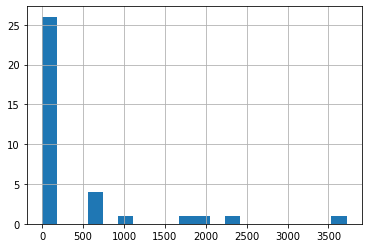

In [1591]:
na_pattern = df_select.isnull().sum().hist(bins=20)
plt.show()

There are five columns with more than 20% missing values, but they need individual consideration.

  * square_feet is almost all blank--people either have no idea of the measurements, or don't think it matters (this information is not provided when we rent a hotel room).  We can remove this column. 
  * weekly_price and monthly_price can be inferred approximately, if necessary, based on the daily price.  Those values are correlated and we can remove these columns.
  * security_deposit and cleaning fee, in contrast, are most likely left blank because they are 0:  no such deposit or fee.  So we will retain these columns and replace the missing data with 0.


In [1592]:
#We drop the square footage, weekly and monthly price columns
df_select = df_select.drop([ 'square_feet', 'weekly_price', 'monthly_price'], axis=1)
df_select.shape

(3818, 32)

In [1593]:
#Replace NaN with 0 in security_deposit and cleaning_fee
df_select['security_deposit'].replace(to_replace=np.NaN, value=0, inplace=True)
df_select['cleaning_fee'].replace(to_replace=np.NaN, value=0, inplace=True)

In [1594]:
#also, drop 'review'rows with null values
df_select = df_select.dropna(subset=['review_scores_rating'], axis=0)
df_select.shape

(3171, 32)

In [1595]:
#check again missing values in columns
check_null_in_cols(df_select)

Feature               Missing data   Percent
bathrooms                        12    0.4
bedrooms                          6    0.2


In [1596]:
#replace missing data with 0 in bathrooms and bedrooms
df_select['bathrooms'].replace(to_replace=np.NaN, value=0, inplace=True)
df_select['bedrooms'].replace(to_replace=np.NaN, value=0, inplace=True)

Next we need to deal with the dates in three columns.  Intuitively, we would think that the length of time a host has been renting is more important than the absolute date.  So, we will engineer a new column called 'host years' equal to the number of years between the last review and the first review.  Note, as a first approximation, we did not worry about a more precise estimate, taking into account the number of months between the last and first dates.

In [1597]:
#Combine first and last review dates as a proxy for "experience"
def convert_dates(df, col):
    '''
    INPUT:
    df - a dataframe
    col - a column with dates
    OUTPUT:
    the year of the event as an integer
    '''
    date_ = df[col].str.split('-')
    year = []
    n_records = df[col].shape[0]
    for i in range (0, n_records):
        year.append(date_.iloc[i][0])
    year_ = pd.Series(year)
    return pd.to_numeric(year_)
year_review_first = convert_dates(df_select, 'first_review')    
year_review_last = convert_dates(df_select, 'last_review')
host_years = np.array(year_review_last) - np.array(year_review_first)

In [1598]:
print(host_years[:15])

[5 2 1 3 0 1 3 0 1 4 0 1 1 0 0]


In [1599]:
#insert a new column in data frame
df_select.insert(2, column='host_years',value=host_years)
#Then remove date columns
df_select = df_select.drop(['host_since', 'first_review', 'last_review'], axis=1)

We also tried to quantify how successful the host is by combining the cumulative number of listings and the host's experience (host years).  This is still experimental and does not seem to do much.  More on this idea later.

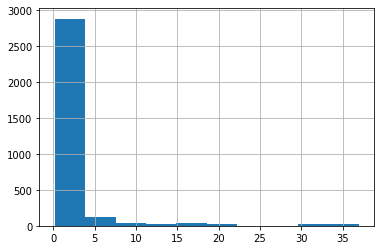

In [1600]:
#engineer a new column = 'calculated_host_listings_count'/'host_years'
hosting_avg = df_select['calculated_host_listings_count']/(df_select['host_years']+1)
hosting_avg.hist();

In [1601]:
#insert this new column
df_select.insert(2, column='host_momentum',value=hosting_avg)
df_select.drop(['calculated_host_listings_count'], axis=1, inplace=True)

In [1602]:
df_select.columns

Index(['buzz_count', 'host_years', 'host_momentum', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'instant_bookable_t',
       'require_guest_profile_picture_t', 'require_guest_phone_verification_t',
       'host_identity_verified_t', 'host_has_profile_pic_t',
       'host_is_superhost_t', 'is_location_exact_t', 'cancellation_flexible',
       'cancellation_moderate', 'cancellation_strict',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [1603]:
df_select.head()

,buzz_count,host_years,host_momentum,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,host_identity_verified_t,host_has_profile_pic_t,host_is_superhost_t,is_location_exact_t,cancellation_flexible,cancellation_moderate,cancellation_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,5,0.333333,4,1.0,1.0,1.0,$85.00,0,0,...,1,1,0,1,0,1,0,1,0,0
1,1,2,2.000000,4,1.0,1.0,1.0,$150.00,$100.00,$40.00,...,1,1,1,1,0,0,1,1,0,0
2,5,1,1.000000,11,4.5,5.0,7.0,$975.00,"$1,000.00",$300.00,...,1,1,0,1,0,0,1,1,0,0
4,4,3,0.250000,6,2.0,3.0,3.0,$450.00,$700.00,$125.00,...,1,1,0,1,0,0,1,1,0,0
5,6,0,1.000000,2,1.0,1.0,1.0,$120.00,0,$40.00,...,1,1,0,1,0,0,1,0,1,0


Finally, we need to convert the currencies (strings) as float, first removing the thousand ',' indicator, and removing the dollar sign if any.

In [1604]:
#Convert string $prices to numeric values
def convert_money(df, col):
    '''
    INPUT:
    df - a dataframe
    col - a column with currency as strings
    OUTPUT:
    a column filled with numeric values
    '''
    s = df[col].replace(regex=r',', value='') #remove the thousand ,
    s = s.str.strip('$')
    s = s.replace(to_replace=np.NaN, value=0)
    return pd.to_numeric(s)
df_select['price'] = convert_money(df_select, 'price')
df_select['security_deposit'] = convert_money(df_select, 'security_deposit')
df_select['cleaning_fee'] = convert_money(df_select, 'cleaning_fee')
df_select['extra_people'] = convert_money(df_select, 'extra_people')

In [1605]:
df_select.head()

,buzz_count,host_years,host_momentum,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,host_identity_verified_t,host_has_profile_pic_t,host_is_superhost_t,is_location_exact_t,cancellation_flexible,cancellation_moderate,cancellation_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,5,0.333333,4,1.0,1.0,1.0,85.0,0.0,0.0,...,1,1,0,1,0,1,0,1,0,0
1,1,2,2.000000,4,1.0,1.0,1.0,150.0,100.0,40.0,...,1,1,1,1,0,0,1,1,0,0
2,5,1,1.000000,11,4.5,5.0,7.0,975.0,1000.0,300.0,...,1,1,0,1,0,0,1,1,0,0
4,4,3,0.250000,6,2.0,3.0,3.0,450.0,700.0,125.0,...,1,1,0,1,0,0,1,1,0,0
5,6,0,1.000000,2,1.0,1.0,1.0,120.0,0.0,40.0,...,1,1,0,1,0,0,1,0,1,0


This concludes the data preparation of the CRISP-DM process. 

4. **Data Modeling**

In the following, we develop a linear model, with price as the dependent variable.

In [1606]:
#A look at the 30 columns in the model
df_select.columns

Index(['buzz_count', 'host_years', 'host_momentum', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'instant_bookable_t',
       'require_guest_profile_picture_t', 'require_guest_phone_verification_t',
       'host_identity_verified_t', 'host_has_profile_pic_t',
       'host_is_superhost_t', 'is_location_exact_t', 'cancellation_flexible',
       'cancellation_moderate', 'cancellation_strict',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [1607]:
#one more check for null values
check_null_in_cols(df_select)

Feature               Missing data   Percent


In [1608]:
y = df_select['price']
X = df_select.drop(['price'], axis=1)

# define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1609]:
#instantiate a linear model
lm_model = LinearRegression(normalize=True)

#fit the model to the training set
lm_model.fit(X_train, y_train)

#predict with training and testing sets, successively
y_preds_train = lm_model.predict(X_train)
y_preds_test = lm_model.predict(X_test)

#calculate the r2 scores
r2_train = r2_score(y_train, y_preds_train)
r2_test = r2_score(y_test, y_preds_test)
print("r2 score with training data", r2_train)
print("r2 score with testing data", r2_test)


r2 score with training data 0.5585796682280495
r2 score with testing data 0.5702738849604249


As a final step, we will look at the weights of the coefficients of the linear model, which indicate of the relative importance of the variables

In [1610]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    
    NOTE: This function was obtained from the Udacity instructor's lecture notes.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(40)

,est_int,coefs,abs_coefs
28,room_type_Shared room,-6.139427e+12,6.139427e+12
27,room_type_Private room,-6.139427e+12,6.139427e+12
26,room_type_Entire home/apt,-6.139427e+12,6.139427e+12
23,cancellation_flexible,3.409897e+12,3.409897e+12
25,cancellation_strict,3.409897e+12,3.409897e+12
24,cancellation_moderate,3.409897e+12,3.409897e+12
20,host_has_profile_pic_t,-5.657672e+01,5.657672e+01
5,bedrooms,2.389484e+01,2.389484e+01
4,bathrooms,2.367070e+01,2.367070e+01
17,require_guest_profile_picture_t,1.450227e+01,1.450227e+01


5. **Evaluation**


We now return to the questions stated in the opening:

A1.  We have identified the 25 most popular terms in the descriptions of the Seattle listings.  See the [blog](https://medium.com/@genevievesegol/what-do-airbnb-and-scientific-american-have-in-common-abdd3ab72dbc) for a visual desription of the results. 

A2. We have found minor differences in the popular terms for Boston, as shown in the companion notebook.  A visual summary of the results is presented in the above blog.

A3. It is unclear if these terms matter.

The r2 scores are weak.  If this were a project with a serious business objective, we could try to improve the results by using a model that is not linear.  I do not think that adding back some of the features we removed would help, on the contrary. 

We see that the two main factors explaining 'price' are the type of accommodation (private room, entire house, etc.) and the cancellation policies.  Interestingly, the host's profile is relevant, as inferred from the ranking of 'host_years,' 'host_identity_verified', and 'host_is_superhost'.  The 'buzz_count' variavble is way down the list--but not dead last :-).

Fundamentally, I think 'price' is unsatisfactory as a dependent variable.  I used it for lack of a better alternative.  One can argue that the variables in the model can explain the rental price for the property. On the other hand, the price surely is a factor in a property’s attractiveness and a guest’s decision to rent it or not. 

To quantify this attractiveness, I wish we had the equivalent of 'days on the market' in real estate, i.e., the length of time between the property being listed for sale and a closed deal.  In my opinion, this data— the time between listing and renting (which Airbnb may be tracking privately)—is the best measure of the demand for a property.  It would be interesting to rerun this analysis with this additional information. 

A summary of this analysis is published on [Medium](https://medium.com/@genevievesegol/what-do-airbnb-and-scientific-american-have-in-common-abdd3ab72dbc)